# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import skfda
from skfda.preprocessing.dim_reduction.projection import FPCA
from skfda.representation.basis import FourierBasis, BSplineBasis
import scipy 
import os

os.chdir('..')
from main import *

# Define functions

In [2]:
def w1(t):
    return (t**2-1)
def w2(t):
    return (0.5)*(t**3-3*t)


def s1(t):
    return (t**3-2*t**2+2)
def s2(t):
    return (-5.75*t**2 + t + 1)

#def s1(t):
 #   return t**2 * np.exp(t)
#def s2(t):
 #   return t*np.exp(-t)

#def w1(t):
    #return 1/4 * (35*t**4 - 30*t**2 + 3)
#def w2(t):
    #return 23/80* (63*t**5 - 70*t**3 + 15*t)

# Define foreground and background data

In [3]:
def error_func(t, amplitude=1):
    return amplitude * np.sin(2 * np.pi * t)

def generate_observations_sim4(t, N, M, error_func):
    x_observations = []
    y_observations = []

    for _ in range(N):
        a1 = np.random.normal(0, 1)
        a2 = np.random.normal(0, 1)
        a3 = np.random.normal(0, 1)
        a4 = np.random.normal(0, 1)

        error = np.random.normal(0, 1, len(t)) * error_func(t)
        x =  a1*w1(t)+a2*w2(t)+a3*s1(t)+a4*s2(t)+error
        x_observations.append(x)

    for _ in range(M):
        a1 = np.random.normal(0, 1)
        a2 = np.random.normal(0, 1)
        
        error = np.random.normal(0, 1, len(t)) * error_func(t)
        y = a1*s1(t)+a2*s2(t)+error
        y_observations.append(y)
        
    return x_observations, y_observations



# Table 2 - Simulation 4

In [4]:
np.random.seed(1)
def run_simulation_table(n_simulations, t, N, M):
    
    fpc1_X = []
    fpc2_X = []
    
    fpc1_XY = []
    fpc2_XY = []
    
    cfpc1 = []
    cfpc2 = []

    for _ in range(n_simulations):
        X, Y = generate_observations_sim4(t,N,M,error_func)  
        components_XY = CFPCA(X+Y,Y,0,t,False, True)[0]
        components_X = CFPCA(X,Y,0,t,False, True)[0]
        component_CFPCA = CFPCA(X,Y,1,t,False, True)[0]
        
        fpc1_XY1 = l2_distance(w1,components_XY[:,0], t)
        fpc2_XY2 = l2_distance(w2,components_XY[:,1], t)
        
        fpc1_X1 = l2_distance(w1,components_X[:,0], t)
        fpc2_X2 = l2_distance(w2,components_X[:,1], t)
        
        cfpc1_1 = l2_distance(w1,component_CFPCA[:,0], t)
        cfpc2_2 = l2_distance(w2,component_CFPCA[:,1], t)
        
        fpc1_XY.append(fpc1_XY1)
        fpc2_XY.append(fpc2_XY2)
        
        fpc1_X.append(fpc1_X1)
        fpc2_X.append(fpc2_X2)
        
        cfpc1.append(cfpc1_1)
        cfpc2.append(cfpc2_2)
    
    return cfpc1, cfpc2, fpc1_XY, fpc2_XY, fpc1_X, fpc2_X

ns = [100000]  

n_simulations =  40
t = np.linspace(-1, 1, 100)  

results = {'N': [], 'cfpc1': [], 'cfpc2': [], 'fpc1_XY': [], 'fpc2_XY': [],'fpc1_X': [], 'fpc2_X': []}

for n in ns:
    cfpc1, cfpc2, fpc1_XY, fpc2_XY, fpc1_X, fpc2_X = run_simulation_table(n_simulations, t, n, n)
    results['N'].append(n)
    results['cfpc1'].append((np.mean(cfpc1), np.std(cfpc1)))
    results['cfpc2'].append((np.mean(cfpc2), np.std(cfpc2)))
    results['fpc1_XY'].append((np.mean(fpc1_XY), np.std(fpc1_XY)))
    results['fpc2_XY'].append((np.mean(fpc2_XY), np.std(fpc2_XY)))
    results['fpc1_X'].append((np.mean(fpc1_X), np.std(fpc1_X)))
    results['fpc2_X'].append((np.mean(fpc2_X), np.std(fpc2_X)))
    
for key, values in results.items():
    if key != 'N':
        print(f"{key}: {values[0][0]:.4f} ({values[0][1]:.4f})")


cfpc1: 0.1443 (0.1259)
cfpc2: 0.1349 (0.1268)
fpc1_XY: 1.3933 (0.0026)
fpc2_XY: 1.2488 (0.0009)
fpc1_X: 1.3909 (0.0038)
fpc2_X: 1.2501 (0.0016)


In [10]:
def run_simulation(n_simulations, t, N, M, alpha):

    distances_cfpc1 = []
    distances_cfpc2 = []

    for _ in range(n_simulations):
        X, Y = generate_observations_sim4(t,N,M,error_func)
        components = CFPCA(X,Y,alpha,t,False, True)[0]
        #plt.plot(t,components[:,0])
        #plt.plot(t,components[:,1])
        cfpc1 = l2_distance(w1,components[:,0], t)
        cfpc2 = l2_distance(w2,components[:,1], t)
        
        distances_cfpc1.append(cfpc1)
        distances_cfpc2.append(cfpc2)

    return distances_cfpc1, distances_cfpc2


ns = [8100,22000,60000,162000,442000,1200000]

n_simulations =  40
t = np.linspace(-1, 1, 100)  

all_distances_cfpc1 = []
all_distances_cfpc2 = []

# Collect all distances
for n in ns:
    distances_cfpc1, distances_cfpc2 = run_simulation(n_simulations, t, n, n, 1)
    all_distances_cfpc1.append(distances_cfpc1)
    all_distances_cfpc2.append(distances_cfpc2)

# Appendix - Figure 12a

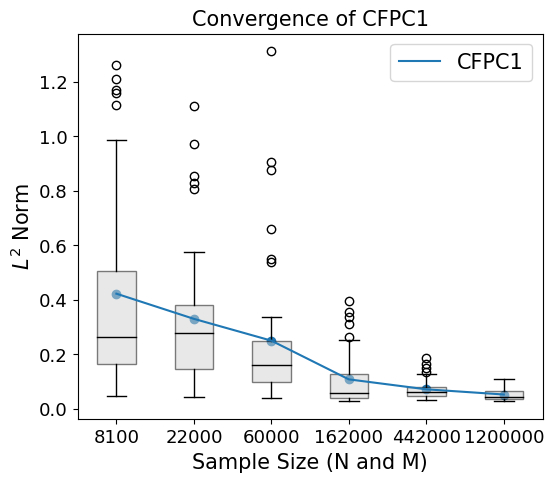

In [12]:
fig, ax = plt.subplots(figsize=(6, 5))

line_color_cfpc1 = '#1f77b4'
line_color_cfpc2 = '#ff800f'

# Plotting boxplots and means for CFPC1
bp_cfpc1 = plot_boxplot_with_overlayed_mean(ax, all_distances_cfpc1, range(1, len(ns)+1), line_color_cfpc1, 'CFPC1')
ax.set_xticks(range(1, len(ns)+1))
ax.set_xticklabels(ns)
plt.tick_params(axis='x', labelsize=13)  
plt.tick_params(axis='y', labelsize=13)  

ax.set_xlabel('Sample Size (N and M)', fontsize = 15)
ax.set_ylabel(r'$L^2$ Norm', fontsize=15)
plt.title("Convergence of CFPC1", fontsize = 15)
ax.legend(fontsize = 15)




# Appendix - Figure 12b

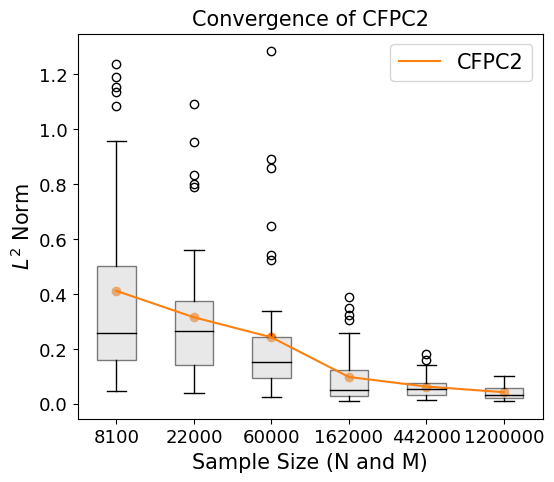

In [13]:
# Plotting boxplots and means for CFPC2
fig, ax = plt.subplots(figsize=(6, 5))

bp_cfpc2 = plot_boxplot_with_overlayed_mean(ax, all_distances_cfpc2, range(1, len(ns)+1), line_color_cfpc2, 'CFPC2')

# Setting the axes and labels
ax.set_xticks(range(1, len(ns)+1))
ax.set_xticklabels(ns, fontsize = 13)

plt.tick_params(axis='x', labelsize=13)  
plt.tick_params(axis='y', labelsize=13)  

ax.set_xlabel('Sample Size (N and M)', fontsize = 15)
ax.set_ylabel(r'$L^2$ Norm', fontsize=15)
plt.title("Convergence of CFPC2", fontsize = 15)
ax.legend(fontsize = 15)

# Show the plot
plt.show()

# Appendix - 12 (c-d)

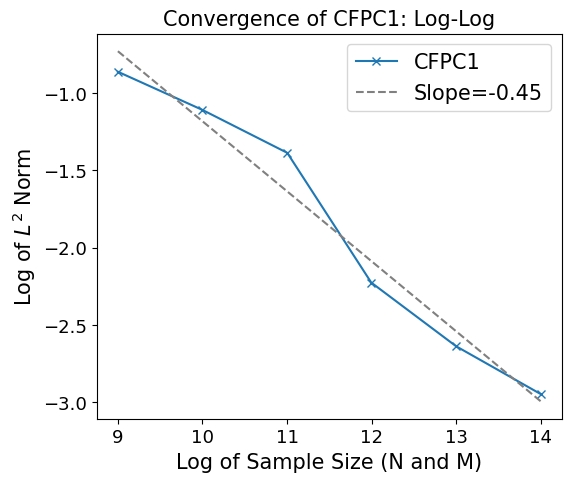

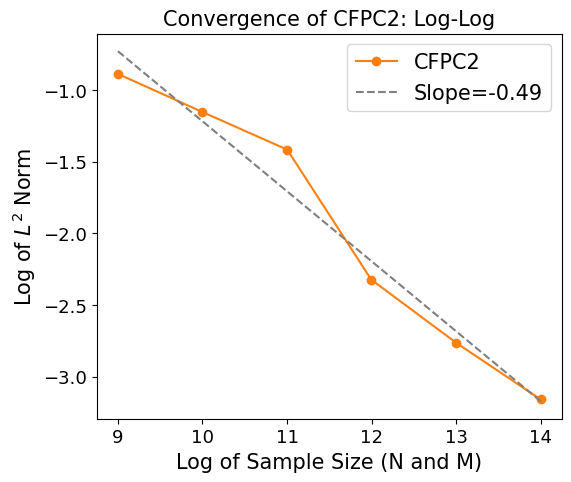

In [20]:
from sklearn.linear_model import LinearRegression

# Plotting the log-log plot for CFPC1
plt.figure(figsize=(6, 5))
plt.plot(log_ns, log_means_cfpc1, marker='x', linestyle='-', color=line_color_cfpc1, label='CFPC1')
plt.xlabel('Log of Sample Size (N and M)', fontsize=15)
plt.ylabel(r'Log of $L^2$ Norm', fontsize=15)
plt.title("Convergence of CFPC1: Log-Log", fontsize=15)
plt.tick_params(axis='x', labelsize=13)  
plt.tick_params(axis='y', labelsize=13)

# Fit linear regression and plot the line
reg_cfpc1 = LinearRegression().fit(np.array(log_ns).reshape(-1, 1), np.array(log_means_cfpc1).reshape(-1, 1))
plt.plot(log_ns, reg_cfpc1.predict(np.array(log_ns).reshape(-1, 1)), color='gray', linestyle='--', label=f'Slope={reg_cfpc1.coef_[0][0]:.2f}')

plt.legend(fontsize=15)
plt.show()

# Plotting the log-log plot for CFPC2
plt.figure(figsize=(6, 5))
plt.plot(log_ns, log_means_cfpc2, marker='o', linestyle='-', color=line_color_cfpc2, label='CFPC2')
plt.xlabel('Log of Sample Size (N and M)', fontsize=15)
plt.ylabel(r'Log of $L^2$ Norm', fontsize=15)
plt.title("Convergence of CFPC2: Log-Log", fontsize=15)
plt.tick_params(axis='x', labelsize=13)  
plt.tick_params(axis='y', labelsize=13)

# Fit linear regression and plot the line
reg_cfpc2 = LinearRegression().fit(np.array(log_ns).reshape(-1, 1), np.array(log_means_cfpc2).reshape(-1, 1))
plt.plot(log_ns, reg_cfpc2.predict(np.array(log_ns).reshape(-1, 1)), color='gray', linestyle='--', label=f'Slope={reg_cfpc2.coef_[0][0]:.2f}')

plt.legend(fontsize=15)
plt.show()
